**TABLE OF CONTENTS**

[Introduction: Customer Personality Analysis.](#0)

[1. Libraries Import & Data loading.](#1)

[2. Exploratory Data Analysis:](#2)

* [Data Overview.](#2.1)
* [New Variables.](#2.2)
* [Data Cleaning.](#2.3)
* [Data Exploration.](#2.4)
 * [Customer Overview.](#2.4.1)
 * [Customer Behaviour.](#2.4.2)
 * [Campaign Performance.](#2.4.3)
 
 
[3. Data Modeling:](#3)
* [Data Preparation.](#3.1)
* [K-Means Algorithm.](#3.2)

[4. Customer Profiling:](#4)

[5. Conclusions.](#5)

<a id="0"></a> <br>
# Project Motivation: Customer Personality Analysis

I decided to analyze "customer-personality-analysis" data to understand:

* How to do an exploratory data analysis from scratch?
* How to implement a K-Means clusterization?
* How to define and analyze customer profiles?
* For that end, I'll respond the following business question:
 * How can we personalize communications based on income and spend?
 * The fact of having children, changes consumer behaviour?
 * The fact of living alone or with a partner, changes consumer behaviour?
 * How age affects to consumer behaviour?


<a id="1"></a> <br>
# 1. Libraries Import & Data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import timedelta, date
from scipy.stats import pearsonr
import statsmodels.api as sm
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

<a id="2"></a> <br>
# 2. Exploratory Data Analysis:


To be able to conclude and get insights from our dataset, we need to understand our data, identify missing values or outliers and calculate new metrics that help us analyzing our customers.

<a id="2.1"></a> <br>
# 2.1. Data Overview


In this section, we want to obtain an overview of our data, know the size of the dataset, identify categorical and quantitative variables and see dataset's temporality.

In [2]:
df = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
pd.set_option('display.max_columns', None)
print('Size of the dataset: ', df.shape)
df.head(5)

Size of the dataset:  (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
print('Summary of statistics:')
df.describe(include = 'all') #we add "include = 'all'" to get summaries of both continuous and categorical variables

Summary of statistics:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [4]:
print('Set of categorical variables:')
set(df.select_dtypes(include=['object']))

Set of categorical variables:


{'Dt_Customer', 'Education', 'Marital_Status'}

In [5]:
print('Date period from: ' , pd.DatetimeIndex(df['Dt_Customer']).min() ,'to ', pd.DatetimeIndex(df['Dt_Customer']).max())

Date period from:  2012-01-08 00:00:00 to  2014-12-06 00:00:00


<a id="2.2"></a> <br>
# 2.2. New Variables





We are going to add some variables that will help us understanding our customers' behaviour and answer the questions in [section (2.4)](#2.4)
* ***created_at***: is the assumed report creation date, based on the maximum value of Dt_Customer,
* ***age***: customer age,
* ***has_children***: responds if a customer is parent (Y) or not (N)
* ***live_with_partner*** : responds if a customer live with a partner (Y) or not (Y)
* ***tenure_days***: number of days from customer's creation date to extraction date,
* ***tenure_months***: number of months from customer's creation date to extraction date,
* ***tenure_years***: number of years from customer's creation date to extraction date,
* ***total_spend***: total spend of each customer, summing up all categories: wines, fruits, meat, fish, sweet and gold,
* ***monthly_spend***: spend by month,
* ***total_purchases***: number of total purchases, summing up web, catalog and store purchases,
* ***spend_by_purchase***: total spend by total purchases



In [6]:
df['created_at'] = pd.DatetimeIndex(df['Dt_Customer']).max() + pd.Timedelta('1 day')# created date is the assumed report created date, based on the created_date of the newest customer
df['age'] = pd.DatetimeIndex(df['Dt_Customer']).max().year-df['Year_Birth'] # customer age on extraction date
df['has_children'] = np.where(df['Kidhome']+df['Teenhome']==0, 'N', 'Y')
df['live_with_partner'] = df['Marital_Status'].map(lambda x: x.lower() if pd.notnull(x) else x).replace({"married":"Y", "together":"Y", "single":"N", "divorced":"N", "widow":"N", "alone":"N", "absurd":"N","yolo":"N"})
df['tenure_days'] = pd.DatetimeIndex(df['created_at'])- pd.DatetimeIndex(df['Dt_Customer']) # days from customer created date
df['tenure_months'] = (df['tenure_days'].dt.days/30) # months from customer created date
df['tenure_years'] = (df['tenure_days'].dt.days/365) # years from customer created date
df['total_spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['monthly_spend'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])/(df['tenure_months'])
df['total_purchases'] = (df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])
df['spend_by_purchase'] = df['total_spend'] / df['total_purchases']
df['accepted_campaigns'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['monthly_purchases'] = df['total_purchases']/(df['tenure_months'])

After adding new variables, we want to show again the statistical overview of each metric, to identify new needs on the following section: [2.3 Data Cleaning](#2.3).

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,tenure_days,tenure_months,tenure_years,total_spend,monthly_spend,total_purchases,spend_by_purchase,accepted_campaigns,monthly_purchases
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,45.194196,513 days 01:02:21.428571432,17.101443,1.405598,605.798214,118.427216,14.862054,inf,0.446875,2.835187
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,232 days 05:31:02.717688372,7.740996,0.636246,602.249288,1052.439084,7.677173,NaN,0.890543,18.757968
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,18.000000,1 days 00:00:00,0.033333,0.002740,5.000000,0.248756,0.000000,0.533333,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,37.000000,341 days 18:00:00,11.391667,0.936301,68.750000,5.173438,8.000000,9.714286,0.000000,0.501672
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,514 days 00:00:00,17.133333,1.408219,396.000000,23.687624,15.000000,23.425214,0.000000,0.886470
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000,686 days 06:00:00,22.875000,1.880137,1045.500000,61.355140,21.000000,45.540000,1.000000,1.321101
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,121.000000,1064 days 00:00:00,35.466667,2.915068,2525.000000,22170.000000,44.000000,inf,5.000000,330.000000


<a id="2.3"></a> <br>
# 2.3. Data Cleaning


We identify that 'Z_CostContact' and 'Z_Revenue' are both constant variables that does not add information to our analysis, so we can drop them from the dataset.

In [8]:
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

Also, we need to check if there are missing values and treat these cases.

In [9]:
print('Set of variables with null values:')
set(df.columns[df.isnull().mean()>0])

Set of variables with null values:


{'Income'}

We identify that the variable 'Income' has missing values. We decide to input the median income to null values.
*(We decided to use median instead of mean because, as we will see in XX section, 'Income' has a skewed distribution)*

In [10]:
fill_median = lambda col : col.fillna(col.median()) #lambda function inputs median where there is NaN values
df['Income'] = df[['Income']].apply(fill_median, axis=0)

Also, we see that there are some customers with total_spend but without purchases, which seems to be an inconsistency.
Then, we decide to drop these lines (4 customers).

In [11]:
df = df.drop(df[df['total_purchases']==0].index)

<a id="2.4"></a> <br>
# 2.4. Data Exploration


We want to start visualizing who are our customers and how they behave. 
Hence, we are going to explore our data to respond the following questions:

<a id="2.4.1"></a> <br>
# 2.4.1. Customer Overview

* How many customers do we have?

* How are our customers?: How old are them? Do they have children? What is their marital status? How much do they earn?





In [12]:
print('There are ', df['ID'].nunique(), ' customers.')

There are  2236  customers.


We define age ranges (we use these ranges because are commonly used age bands for consultations, that might differe depending on the store/company interests and customer target).
* 18-24, 
* 25-34, 
* 35-44, 
* 45-54, 
* 55-64 
* 65 and over.

Thanks to "aego" for the easy, quick and clean code idea in [StackOverflow](https://stackoverflow.com/questions/34165876/trying-to-create-grouped-variable-in-python)

In [13]:
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_range'] = pd.cut(df['age'], bins, labels = labels,include_lowest = True)
df[['age', 'age_range']];

Table and bar plot by age ranges:


,age_range,ID,customer_age_range_%
0,18-24,91,0.040752
1,25-34,386,0.172862
2,35-44,756,0.338558
3,45-54,485,0.217197
4,55-64,438,0.196149
5,65+,77,0.034483


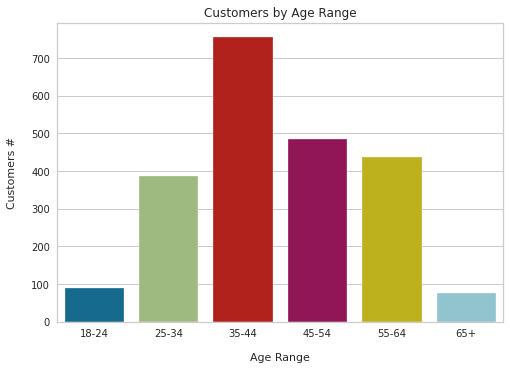

In [14]:
print('Table and bar plot by age ranges:')
customers_age_range = df.groupby('age_range', as_index=False).ID.count()
sns.barplot(data=customers_age_range, x='age_range', y='ID', order=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
plt.xlabel("Age Range", labelpad=14)
plt.ylabel("Customers #", labelpad=14)
plt.title("Customers by Age Range");  
customers_age_range['customer_age_range_%'] = customers_age_range.ID / customers_age_range.ID.sum()
customers_age_range # Print table with percentage values

Table and bar plot by age ranges, with split between customes having childer or not:


has_children,N,Y
age_range,,
18-24,9.62,1.88
25-34,20.50,16.01
35-44,21.45,38.77
45-54,19.24,22.70
55-64,19.72,19.57
65+,9.46,1.06


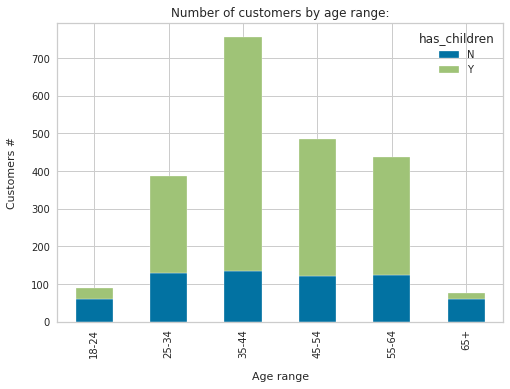

In [15]:
print('Table and bar plot by age ranges, with split between customes having childer or not:')
customers_age_range_children = df.groupby(['age_range', 'has_children']).ID.count().unstack()
customers_age_range_children.plot(kind='bar', stacked=True)
plt.xlabel("Age range", labelpad=14)
plt.ylabel("Customers #", labelpad=14)
plt.title("Number of customers by age range:");
customers_age_range_children.apply(lambda x:100 * x / float(x.sum())).round(2)

Table and bar plot by age ranges, split by simplified marital_status: living with or without a partner:


live_with_partner,N,Y
age_range,,
18-24,5.82,3.12
25-34,16.43,17.75
35-44,30.72,35.58
45-54,23.51,20.74
55-64,20.35,19.21
65+,3.16,3.61


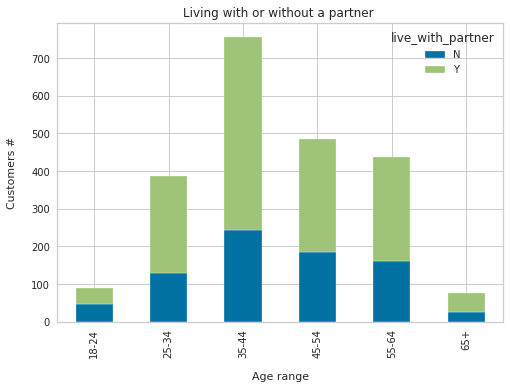

In [16]:
print('Table and bar plot by age ranges, split by simplified marital_status: living with or without a partner:')
customers_age_range_partner = df.groupby(['age_range', 'live_with_partner']).ID.count().unstack()
customers_age_range_partner.plot(kind='bar',stacked=True)
plt.xlabel("Age range", labelpad=14)
plt.ylabel("Customers #", labelpad=14)
plt.title("Living with or without a partner ");
customers_age_range_partner.apply(lambda x:100 * x / float(x.sum())).round(2)

In [17]:
print('Summary table with all the above conditions: split by age range, having children or not and living with a partner or not:')

df_summary = df.groupby(['age_range','has_children', 'live_with_partner'], as_index=False).ID.count()
df_summary['pctg'] = df_summary.ID / df_summary.ID.sum()
df_summary.sort_values('pctg', ascending=False)


Summary table with all the above conditions: split by age range, having children or not and living with a partner or not:


,age_range,has_children,live_with_partner,ID,pctg
11,35-44,Y,Y,423,0.189431
15,45-54,Y,Y,228,0.102105
19,55-64,Y,Y,204,0.091357
10,35-44,Y,N,197,0.088222
7,25-34,Y,Y,177,0.079266
14,45-54,Y,N,135,0.060457
18,55-64,Y,N,109,0.048813
9,35-44,N,Y,90,0.040305
5,25-34,N,Y,79,0.035378
6,25-34,Y,N,79,0.035378


Text(0, 0.5, 'Number of customers')

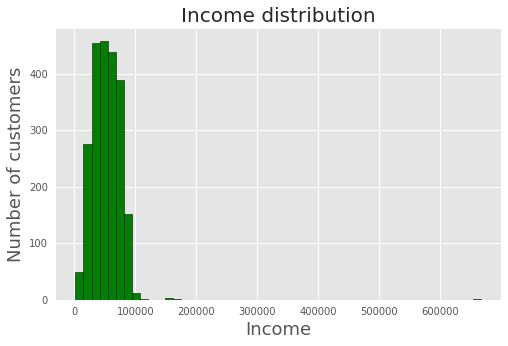

In [18]:
plt.style.use('ggplot')

# histogram of the age
df.Income.plot(bins = 50, kind='hist', color='green', edgecolor='black', figsize=(8,5))
plt.title('Income distribution', size=20)
plt.xlabel('Income', size=18)
plt.ylabel('Number of customers', size=18)

count      2236.000000
mean      52188.664580
std       24827.845432
min        1730.000000
25%       35616.750000
50%       51381.500000
75%       68275.750000
max      666666.000000
Name: Income, dtype: float64


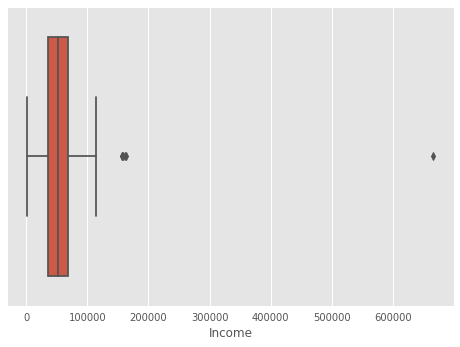

In [19]:
sns.boxplot(x=df['Income'])
print(df['Income'].describe())

When we analyze the "Income" distribution, we see that there is are some outliers of the distribution and, also, an extreme outlier value, that might probably be an error in the input data or a value informed by a person that didn't want to inform his/her income. For that reason, we decide to input the extreme outlier value to the median value of the distribution, as we did in the section  [Data Cleaning](#2.2) section with the N/A values.

In [20]:
df['Income'] = np.where(df['Income']==666666.0, df['Income'].median(), df['Income'])

count      2236.000000
mean      51913.492621
std       21151.968646
min        1730.000000
25%       35616.750000
50%       51381.500000
75%       68179.500000
max      162397.000000
Name: Income, dtype: float64


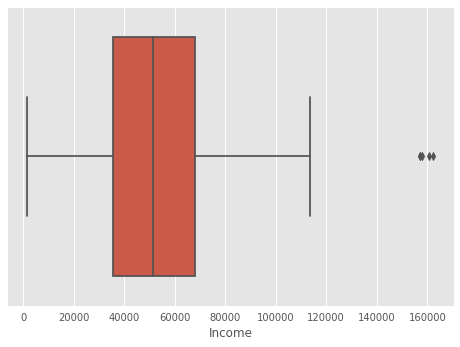

In [21]:
sns.boxplot(x=df['Income'])
print(df['Income'].describe())

Text(0, 0.5, 'Customers #')

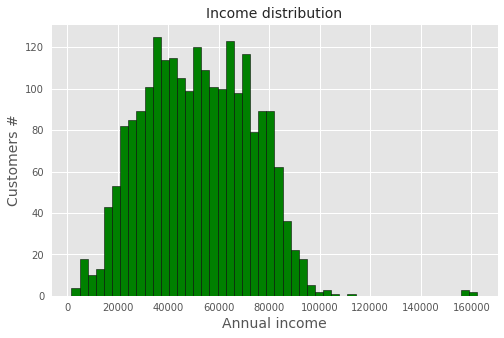

In [22]:
plt.style.use('ggplot')

# histogram of the age
df.Income.plot(bins = 50, kind='hist', color='green', edgecolor='black', figsize=(8,5))
plt.title('Income distribution', size=14)
plt.xlabel('Annual income', size=14)
plt.ylabel('Customers #', size=14)

We can see in the boxplot and in the histogram that there are still some outliers values. 
However, we decide not to treat outliers for the moment, because this data might be relevant.

<a id="2.4.2"></a> <br>
# 2.4.2. Customer Behaviour

* When did our customers engage our company?

* How many purchases they did?

* How how much did they spend?

* When was the last time they bought?

* What are their favourite categories?

* Are they buying online, offline or both?



When did our customers engage our company?: Customer distribution by tenure expressed in months:


Text(0, 0.5, 'Number of customers')

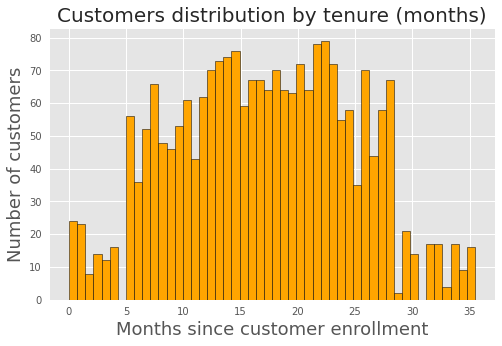

In [23]:
print('When did our customers engage our company?: Customer distribution by tenure expressed in months:')
plt.style.use('ggplot')

df.tenure_months.plot(bins = 50, kind='hist', color='orange', edgecolor='black', figsize=(8,5))
plt.title('Customers distribution by tenure (months)', size=20)
plt.xlabel('Months since customer enrollment', size=18)
plt.ylabel('Number of customers', size=18)


How many purchases they did?: Distribution of total purchases by customer


Text(0, 0.5, 'Number of customers')

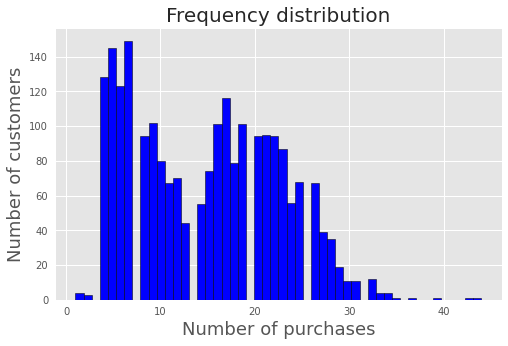

In [24]:
print('How many purchases they did?: Distribution of total purchases by customer')
plt.style.use('ggplot')

df.total_purchases.plot(bins = 50, kind='hist', color='blue', edgecolor='black', figsize=(8,5))
plt.title('Frequency distribution', size=20)
plt.xlabel('Number of purchases', size=18)
plt.ylabel('Number of customers', size=18)

Again, in the "spend_by_purchase" distribution there is an exteme outlier value. 
Our hypothesis is that this might be a input mistake or a extreme rare purchase, maybe a customer who is reselling products and then the behaviour is not the same than the rest of the customers in terms of spend. 
Then, we decide to drop this line.

count    2236.000000
mean       33.330979
std        45.032550
min         0.533333
25%         9.714286
50%        23.379808
75%        45.353365
max      1679.000000
Name: spend_by_purchase, dtype: float64


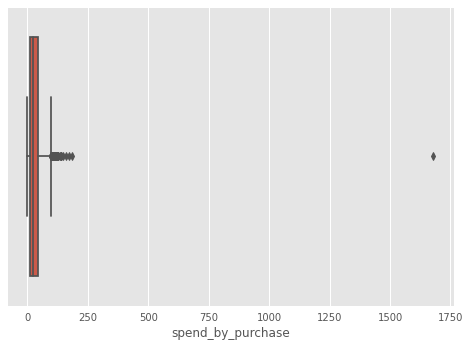

In [25]:
sns.boxplot(x=df['spend_by_purchase'])
print(df['spend_by_purchase'].describe())

In [26]:
df = df.drop(df[df['spend_by_purchase']>1000].index)

How how much did our customers spend?: Spend by purchase distribution:


Text(0, 0.5, 'Number of customers')

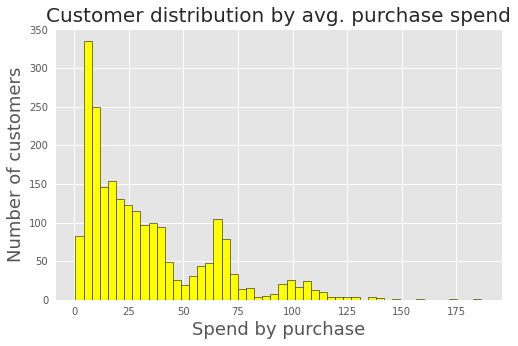

In [27]:
print('How how much did our customers spend?: Spend by purchase distribution:')
plt.style.use('ggplot')

df.spend_by_purchase.plot(bins = 50, kind='hist', color='yellow', edgecolor='black', figsize=(8,5))
plt.title('Customer distribution by avg. purchase spend', size=20)
plt.xlabel('Spend by purchase', size=18)
plt.ylabel('Number of customers', size=18)

When was the last time they bought?: Recency distribution


Text(0, 0.5, 'Number of customers')

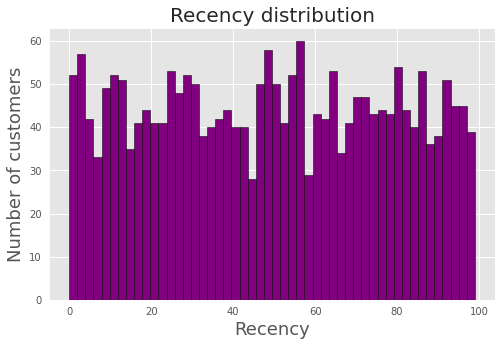

In [28]:
print('When was the last time they bought?: Recency distribution')
plt.style.use('ggplot')

df.Recency.plot(bins = 50, kind='hist', color='purple', edgecolor='black', figsize=(8,5))
plt.title('Recency distribution', size=20)
plt.xlabel('Recency', size=18)
plt.ylabel('Number of customers', size=18)

In [29]:
df_categories = {'categories':['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'],
                'spend':[df['MntWines'].sum(), df['MntFruits'].sum(), df['MntMeatProducts'].sum(), df['MntFishProducts'].sum(), df['MntSweetProducts'].sum(),df['MntGoldProds'].sum() ]}
df_categories = pd.DataFrame(df_categories)
df_categories = df_categories.sort_values('spend', ascending=False)
df_categories

,categories,spend
0,Wines,680777
2,Meat,372356
5,Gold,98583
3,Fish,84042
4,Sweet,60615
1,Fruits,58911


Wines is the first category in terms of spend


Text(0, 0.5, 'Spend')

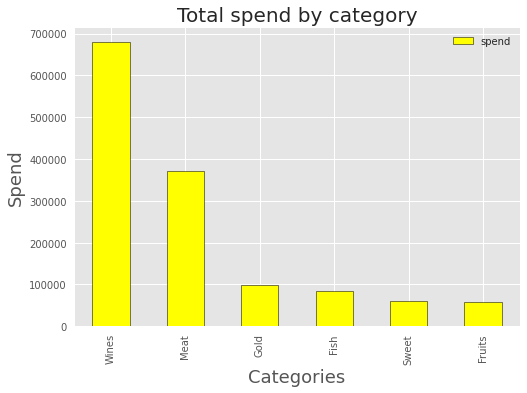

In [30]:
print('Wines is the first category in terms of spend')
df_categories.plot.bar(x='categories', color='yellow', edgecolor='black')

plt.title('Total spend by category', size=20)
plt.xlabel('Categories', size=18)
plt.ylabel('Spend', size=18)

In [31]:
df_purchase_type = {'purchase_type':['Deals', 'Web', 'Catalog', 'Store'],
                'purchases':[df['NumDealsPurchases'].sum(), df['NumWebPurchases'].sum(), df['NumCatalogPurchases'].sum(), df['NumStorePurchases'].sum() ]}
df_purchase_type = pd.DataFrame(df_purchase_type)
df_purchase_type = df_purchase_type.sort_values('purchases', ascending=False)
df_purchase_type

,purchase_type,purchases
3,Store,12969
1,Web,9150
2,Catalog,5963
0,Deals,5208


Are they buying online, offline or both?


Text(0, 0.5, 'Spend')

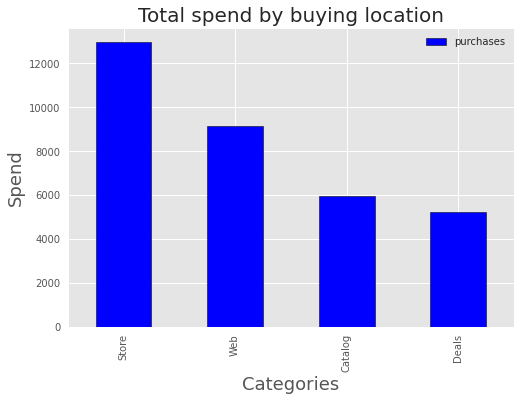

In [32]:
print('Are they buying online, offline or both?')
df_purchase_type.plot.bar(x='purchase_type', color='blue', edgecolor='black')
plt.title('Total spend by buying location', size=20)
plt.xlabel('Categories', size=18)
plt.ylabel('Spend', size=18)

------------- ANALYSIS -----------------------

Text(0, 0.5, 'Annual Income')

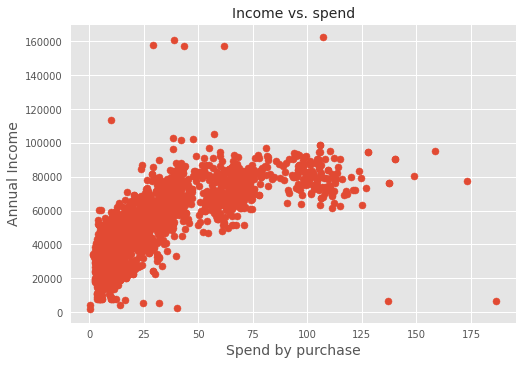

In [33]:
pyplot.scatter(df['spend_by_purchase'], df['Income'] )
plt.title('Income vs. spend', size=14)
plt.xlabel('Spend by purchase', size=14)
plt.ylabel('Annual Income', size=14)

In [34]:
corr, _ = pearsonr(df['spend_by_purchase'], df['Income'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.756


<a id="2.4.3"></a> <br>
# 2.4.3. Campaign Performance

* We are launching 5 campaigns. Do are these campaigns performing?


In [35]:
df_campaigns = {'categories':['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'],
                'campaign_accepted':[df['AcceptedCmp1'].sum(), df['AcceptedCmp2'].sum(), df['AcceptedCmp3'].sum(), df['AcceptedCmp4'].sum(), df['AcceptedCmp5'].sum(),df['Response'].sum() ]}
df_campaigns = pd.DataFrame(df_campaigns)
df_campaigns = df_campaigns.sort_values('campaign_accepted', ascending=False)
df_campaigns

,categories,campaign_accepted
5,Response,334
3,AcceptedCmp4,166
2,AcceptedCmp3,163
4,AcceptedCmp5,163
0,AcceptedCmp1,144
1,AcceptedCmp2,30


What campaign performed better?


Text(0, 0.5, 'Accepted campaigns')

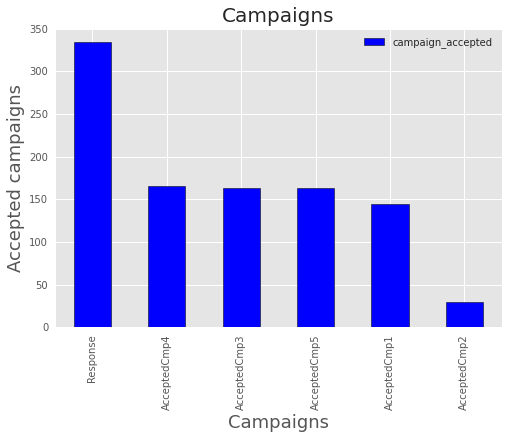

In [36]:
print('What campaign performed better?')
df_campaigns.plot.bar(x='categories', color='blue', edgecolor='black')
plt.title('Campaigns', size=20)
plt.xlabel('Campaigns', size=18)
plt.ylabel('Accepted campaigns', size=18)

<a id="3"></a> <br>
# 3. Data Modelling




<a id="3.1"></a> <br>
# 3.1 Data Preparation


We define the continuous variables that are going to be part of the model:

In [37]:
df1 = df[['age','live_with_partner','Income', 'has_children', 'tenure_months', 'Recency', 'monthly_spend', 'monthly_purchases', 'accepted_campaigns']]
df_model = pd.get_dummies(df1)
df_model

,age,Income,tenure_months,Recency,monthly_spend,monthly_purchases,accepted_campaigns,live_with_partner_N,live_with_partner_Y,has_children_N,has_children_Y
0,57,58138.0,32.400000,58,49.907407,0.771605,1,1,0,1,0
1,60,46344.0,4.200000,38,6.428571,1.428571,0,1,0,0,1
2,49,71613.0,15.766667,26,49.217759,1.331924,0,0,1,1,0
3,30,26646.0,2.200000,26,24.090909,3.636364,0,0,1,0,1
4,33,58293.0,10.733333,94,39.316770,1.770186,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2235,47,61223.0,18.066667,46,74.225092,0.996310,0,0,1,0,1
2236,68,64014.0,2.066667,56,214.838710,10.645161,1,0,1,0,1
2237,33,56981.0,10.533333,91,117.816456,1.803797,1,1,0,1,0
2238,58,69245.0,10.566667,8,79.779180,2.176656,0,0,1,0,1


We need scale the continuous features, to give equal importance to all features:

In [38]:
continuous = ['Income','Recency', 'age', 'tenure_months', 'monthly_spend', 'monthly_purchases']
ss = StandardScaler()

for col in continuous:
    df_model[col] = ss.fit_transform(df_model[[col]])

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

In [39]:
df_model

,age,Income,tenure_months,Recency,monthly_spend,monthly_purchases,accepted_campaigns,live_with_partner_N,live_with_partner_Y,has_children_N,has_children_Y
0,0.985233,0.294264,1.976161,0.307723,-0.065269,-0.110252,1,1,0,1,0
1,1.235555,-0.263320,-1.668089,-0.382800,-0.106545,-0.075259,0,1,0,0,1
2,0.317709,0.931321,-0.173344,-0.797115,-0.065924,-0.080407,0,0,1,1,0
3,-1.267662,-1.194581,-1.926547,-0.797115,-0.089778,0.042337,0,0,1,0,1
4,-1.017340,0.301592,-0.823795,1.550666,-0.075323,-0.057063,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2235,0.150828,0.440114,0.123882,-0.106591,-0.042184,-0.098284,0,0,1,0,1
2236,1.903080,0.572064,-1.943777,0.238671,0.091306,0.415657,1,0,1,0,1
2237,-1.017340,0.239565,-0.849641,1.447087,-0.000801,-0.055273,1,1,0,1,0
2238,1.068674,0.819369,-0.845333,-1.418586,-0.036911,-0.035413,0,0,1,0,1


<a id="3.2"></a> <br>
# 3.2 K-Means Clusterization




We want to create groups where each customer is similar to one another in the same group, and different from customers in other groups. This is the definition of clusterization. To that end, we use a K-means clustering model, which is one of the most popular unsupervised machine learning algorithms.

In [40]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_model)
    Sum_of_squared_distances.append(km.inertia_)

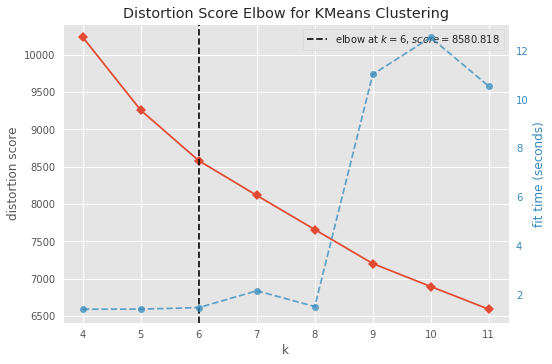

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(df_model)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

In [42]:
kmeans = KMeans(6)

In [43]:
identified_clusters = kmeans.fit_predict(df_model)
df_model['clusters'] = identified_clusters
df['clusters'] = identified_clusters

<a id="4"></a> <br>
# 4. Customer Profiling




Text(0, 0.5, 'Number of customers')

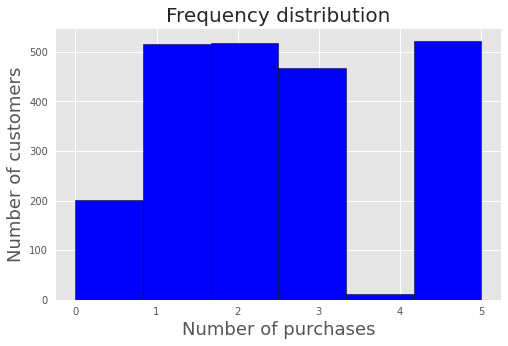

In [44]:
plt.style.use('ggplot')

df_model.clusters.plot(bins = 6, kind='hist', color='blue', edgecolor='black', figsize=(8,5))
plt.title('Frequency distribution', size=20)
plt.xlabel('Number of purchases', size=18)
plt.ylabel('Number of customers', size=18)

In [45]:
df_model['clusters'].value_counts()

5    522
2    518
1    515
3    468
0    201
4     11
Name: clusters, dtype: int64

In [46]:
metrics = ["age", "Income", "spend_by_purchase", "tenure_months", "total_purchases", "Recency"]
pd.pivot_table(data = df, index = ['clusters'], values = metrics, margins=True)

,Income,Recency,age,spend_by_purchase,tenure_months,total_purchases
clusters,,,,,,
0,81192.333333,42.626866,41.850746,77.337170,18.153068,20.870647
1,45712.829126,72.683495,40.720388,27.955441,23.714045,14.697087
2,58109.286680,70.339768,50.982625,34.430946,10.613771,15.158301
3,57440.830128,24.997863,55.166667,36.115303,19.791026,18.036325
4,77726.272727,41.272727,49.727273,61.286707,0.096970,20.181818
5,35110.180077,28.967433,36.107280,14.359963,14.585760,9.599617
All,51913.730649,49.087248,45.192394,32.594662,17.108039,14.894855


In [47]:
df.groupby(['clusters', 'has_children']).ID.count().unstack()

has_children,N,Y
clusters,,
0,158,43
1,105,410
2,169,349
3,123,345
4,7,4
5,72,450


In [48]:
df.groupby(['clusters', 'live_with_partner']).ID.count().unstack()

live_with_partner,N,Y
clusters,,
0,86,115
1,185,330
2,178,340
3,168,300
4,4,7
5,172,350


In [49]:
df.groupby(['clusters', 'Education']).ID.count().unstack()

Education,2n Cycle,Basic,Graduation,Master,PhD
clusters,,,,,
0,14.0,NaN,105.0,34.0,48.0
1,57.0,21.0,285.0,69.0,83.0
2,34.0,3.0,241.0,98.0,142.0
3,32.0,2.0,225.0,85.0,124.0
4,NaN,NaN,9.0,NaN,2.0
5,65.0,28.0,259.0,84.0,86.0


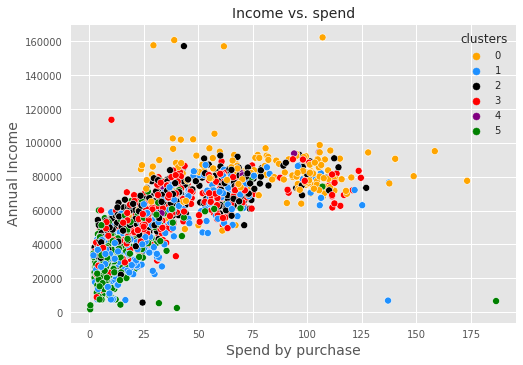

In [50]:
ax = sns.scatterplot(data = df,x=df["spend_by_purchase"], y=df["Income"],hue=df["clusters"], 
                     palette=['orange','dodgerblue','black','red','purple', 'green'], legend='full')
plt.title('Income vs. spend', size=14)
plt.xlabel('Spend by purchase', size=14)
plt.ylabel('Annual Income', size=14)
plt.show()

In this graph we see a clear split by clusters when taking into account spend and annual income

In the following example, we compare the same graph, only with two clusters too easier see the differences between both:

In [51]:
df_graph = df.loc[df['clusters'].isin([5,3])]

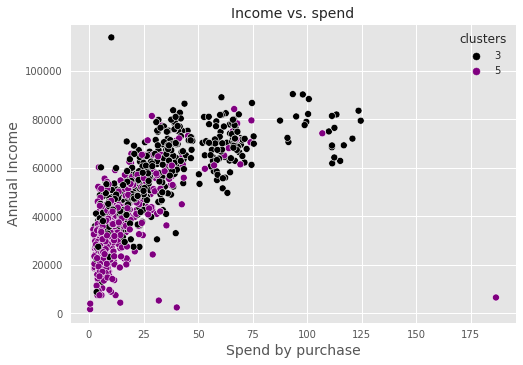

In [52]:
ax = sns.scatterplot(data = df_graph,x=df_graph["spend_by_purchase"], y=df_graph["Income"],hue=df_graph["clusters"], 
                     palette=['black','purple'], legend='full')
plt.title('Income vs. spend', size=14)
plt.xlabel('Spend by purchase', size=14)
plt.ylabel('Annual Income', size=14)
plt.show()

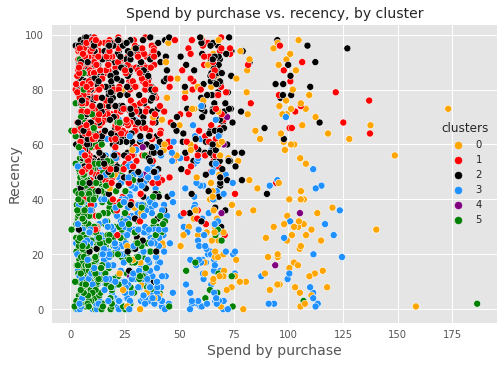

In [53]:
ax = sns.scatterplot(data = df,x=df["spend_by_purchase"], y=df["Recency"],hue=df["clusters"], 
                     palette=['orange','red','black','dodgerblue','purple', 'green'], legend='full')
plt.title('Spend by purchase vs. recency, by cluster', size=14)
plt.xlabel('Spend by purchase', size=14)
plt.ylabel('Recency', size=14)
plt.show()

In [54]:
df_graph = df.loc[df['clusters'].isin([0,4])]

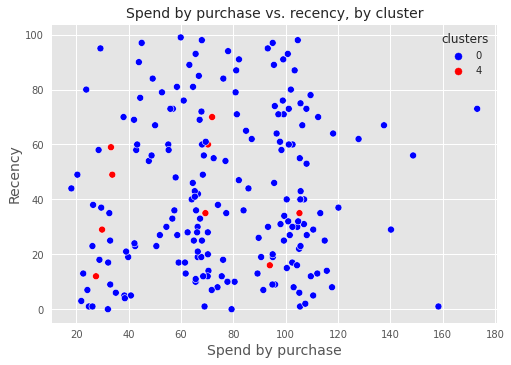

In [55]:
ax = sns.scatterplot(data = df_graph,x=df_graph["spend_by_purchase"], y=df_graph["Recency"],hue=df_graph["clusters"], 
                     palette=['blue','red'], legend='full')
plt.title('Spend by purchase vs. recency, by cluster', size=14)
plt.xlabel('Spend by purchase', size=14)
plt.ylabel('Recency', size=14)
plt.show()

In [56]:
df_graph = df.loc[df['clusters'].isin([0,5])]

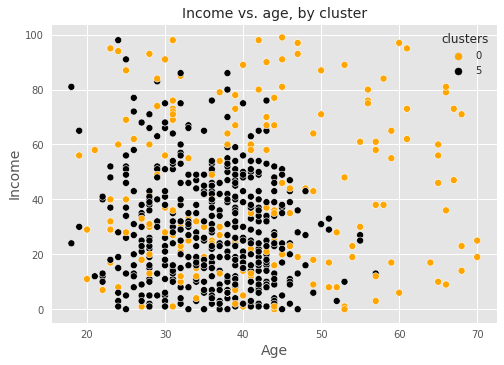

In [57]:
ax = sns.scatterplot(data = df_graph,x=df_graph["age"], y=df_graph["Recency"],hue=df_graph["clusters"], 
                     palette=['orange','black'], legend='full')
plt.title('Income vs. age, by cluster', size=14)
plt.xlabel('Age', size=14)
plt.ylabel('Income', size=14)
plt.show()

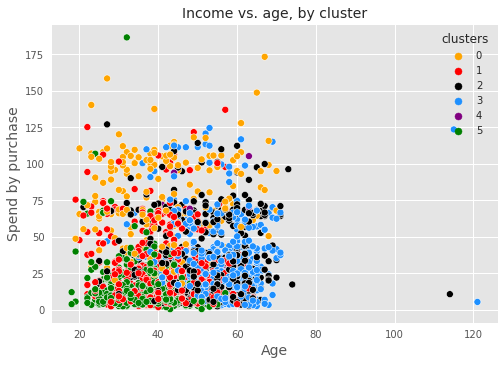

In [58]:
ax = sns.scatterplot(data = df,x=df["age"], y=df["spend_by_purchase"],hue=df["clusters"], 
                     palette=['orange','red','black','dodgerblue','purple', 'green'], legend='full')
plt.title('Income vs. age, by cluster', size=14)
plt.xlabel('Age', size=14)
plt.ylabel('Spend by purchase', size=14)
plt.show()

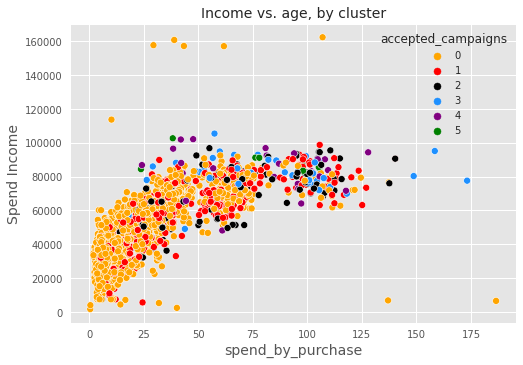

In [59]:
ax = sns.scatterplot(data = df,x=df["spend_by_purchase"], y=df["Income"],hue=df["accepted_campaigns"], 
                     palette=['orange','red','black','dodgerblue','purple', 'green'], legend='full')
plt.title('Income vs. age, by cluster', size=14)
plt.xlabel('spend_by_purchase', size=14)
plt.ylabel('Spend Income', size=14)
plt.show()

<a id="5"></a> <br>
# 5. Conclusions


Customer profiling available [here](https://medium.com/@yolandamarcosd/customer-profiling-how-to-use-data-to-improve-customers-experience-a6159058e231)